In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 
from sklearn import preprocessing 

In [2]:
#load data 
iris=pd.read_csv('C:/Users/ASUS/IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
label_encoder=preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['species'])

In [4]:
x=iris.iloc[:,0:4]
y=iris['species']

In [5]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [7]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
colnames=list(iris.columns)
colnames

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'Species']

In [9]:
#Splitting data into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [10]:
#Builing decison tree
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [11]:
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

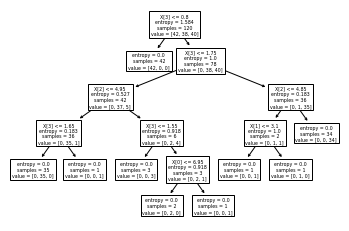

In [12]:
from sklearn import tree
#plot decision tree
tree.plot_tree(model);

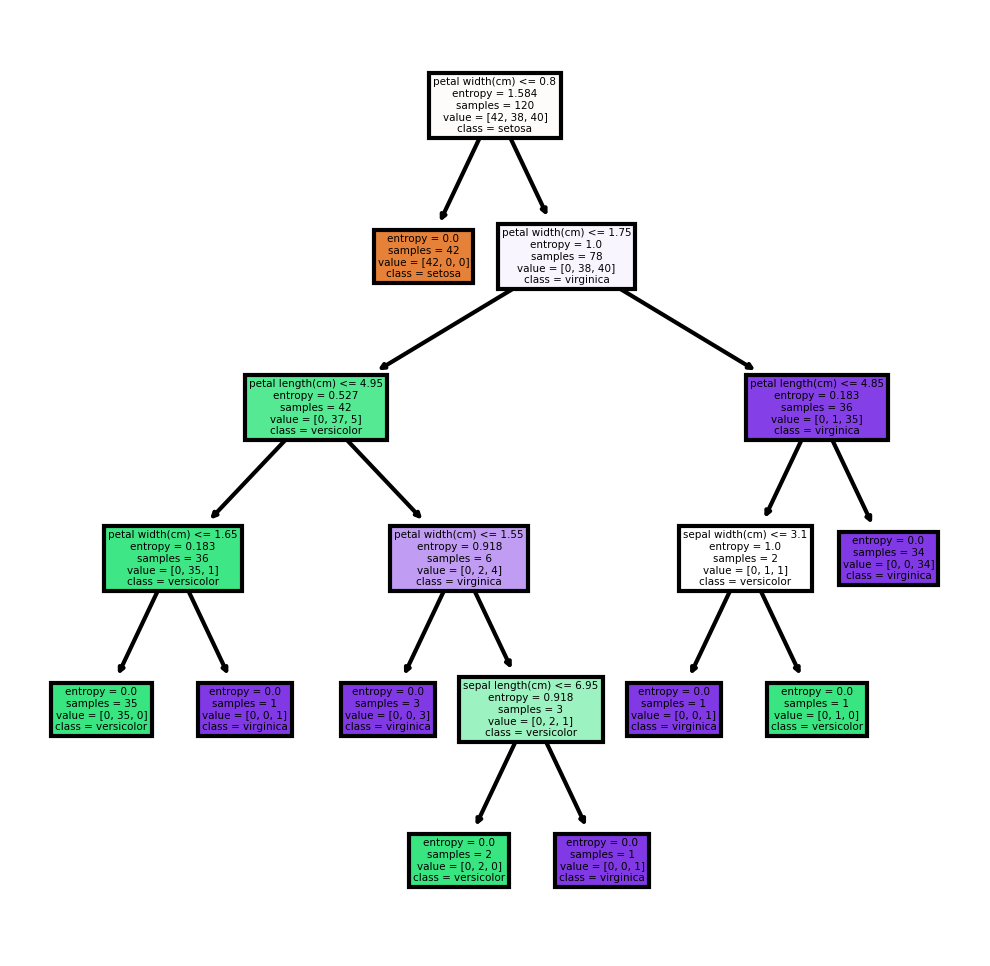

In [13]:
fn=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
cn=['setosa','versicolor','virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);
        

In [14]:
#predicting in test data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

Iris-versicolor    12
Iris-virginica     10
Iris-setosa         8
dtype: int64

In [15]:
pd.crosstab(y_test,preds)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
species,,,
Iris-setosa,8,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,0,10


In [16]:
#Accuracy
np.mean(preds==y_test)

1.0

# CART

In [17]:
#Building decision tree using gini impurity 
from sklearn.tree import DecisionTreeClassifier 
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [18]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [19]:
#Prediction and accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

1.0

In [20]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3
136,6.3,3.4,5.6,2.4
68,6.2,2.2,4.5,1.5
94,5.6,2.7,4.2,1.3
84,5.4,3.0,4.5,1.5
28,5.2,3.4,1.4,0.2


In [21]:
#Decision Tree using regression problem
from sklearn.tree import DecisionTreeRegressor

In [22]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [23]:
array=iris.values
X=array[:,0:3]
y=array[:,3]

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=2)

In [26]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
#Find accuracy
model.score(X_test,y_test)

0.8931506849315068